## Najbol onesnaženi kraji v sloveniji

In [1]:
from pandas.compat import StringIO
import numpy as np
import pandas as pd
    
np.set_printoptions(suppress=True)

# 2019

In [2]:
pm10_2019_frame = pd.read_csv('podatki/pm10_2019.csv', encoding='utf-8')
pm10_2019_frame[:10]

,datum,LJ_Bežigrad,LJ_ BF,LJ_GR,Maribor,Zagorje,Hrastnik,Trbovlje,Novo_mesto,Kranj,M.Sobota,Iskrba,Žerjav,Celje,N.Gorica,Velenje,Koper,NG_Grčna,CE_Mar.,MS_Cank.
0,1.01.2019,34.00,25.00,32.00,40.00,37.00,20.00,27.00,46.0,37.00,40.00,9.00,36.00,40.00,37.00,26.00,15.00,31.00,40.0,54.00
1,2.01.2019,22.00,19.00,23.00,19.00,22.00,10.00,21.00,22.0,11.00,19.00,8.00,13.00,23.00,19.00,9.00,13.00,21.00,23.0,25.00
2,3.01.2019,8.00,6.00,9.00,10.00,11.00,5.00,9.00,21.0,5.00,4.00,5.00,14.00,15.00,20.00,6.00,7.00,22.00,15.0,7.00
3,4.01.2019,14.00,12.00,17.00,26.00,23.00,16.00,-,34.0,17.00,14.00,7.00,15.00,43.00,26.00,14.00,9.00,26.00,46.0,28.00
4,5.01.2019,53.00,44.00,53.00,41.00,64.00,35.00,-,54.0,40.00,40.00,10.00,20.00,69.00,39.00,26.00,22.00,36.00,75.0,54.00
5,6.01.2019,48.00,40.00,48.00,33.00,60.00,46.00,-,49.0,39.00,23.00,10.00,17.00,-,34.00,17.00,25.00,34.00,71.0,36.00
6,7.01.2019,28.00,21.00,26.00,35.00,56.00,35.00,-,39.0,28.00,23.00,9.00,24.00,-,32.00,21.00,15.00,38.00,64.0,37.00
7,8.01.2019,43.00,44.00,43.00,55.00,46.00,8.00,-,43.0,-,57.00,11.00,31.00,-,38.00,38.00,23.00,35.00,82.0,71.00
8,9.01.2019,40.00,42.00,41.00,29.00,56.00,31.00,-,55.0,53.00,41.00,10.00,19.00,70.00,47.00,28.00,30.00,42.00,77.0,54.00
9,10.01.2019,43.00,34.00,42.00,25.00,39.00,19.00,29.00,42.0,39.00,17.00,9.00,27.00,44.00,25.00,10.00,8.00,28.00,50.0,22.00


# 2020

In [3]:
pm10_2020_frame = pd.read_csv('podatki/pm10_2020.csv', encoding='utf-8')
pm10_2020_frame[:10]

,datum,LJ_Bežigrad,LJ_ BF,LJ_GR,Maribor,Zagorje,Hrastnik,Trbovlje,Novo_mesto,Kranj,...,Žerjav,Celje,N.Gorica,Velenje,Koper,NG_Grčna,CE_Mar.,MS_Cank.,Maribor.VR,Ptuj
0,01.01.20,93,90,103,53,94,56,89,68,48,...,49,88,23,50,26,30,96,78,48,56
1,02.01.20,71,69,74,57,74,45,75,48,52,...,48,72,27,22,17,29,79,78,35,66
2,03.01.20,78,84,86,65,94,51,74,42,50,...,42,89,39,20,45,39,95,88,47,80
3,04.01.20,99,88,103,78,82,53,75,65,45,...,38,84,38,17,47,37,95,90,40,103
4,05.01.20,42,34,47,19,41,22,36,46,18,...,25,25,20,9,7,26,28,14,11,20
5,06.01.20,51,36,56,41,62,39,56,39,34,...,49,63,30,26,17,35,73,46,28,29
6,07.01.20,77,56,76,68,76,56,68,52,50,...,42,93,44,35,35,50,100,80,45,54
7,08.01.20,86,74,91,64,84,53,80,56,51,...,44,94,34,39,20,39,98,83,45,64
8,09.01.20,93,77,97,82,84,48,71,47,63,...,48,101,41,43,38,42,111,71,55,48
9,10.01.20,50,35,48,81,47,23,32,34,38,...,52,55,57,38,44,59,63,79,63,75


### April & maj

In [27]:
pm10_hours_frame = pd.read_csv('podatki/pm10_april_maj.csv', encoding='utf-8')
pm10_hours_frame['datum'] = pd.to_datetime(pm10_hours_frame['datum'], dayfirst=True).dt.strftime('%m/%d/%y')
pm10_hours = pm10_hours_frame.values

In [28]:
# izračun povprečnih količin za mesec
days, counts = np.unique(pm10_hours[:, 0], return_counts=True)
data = np.array(days.reshape(-1,1))
for city in range(1, len(pm10_hours[0, :])):
    means = []
    for d in range(len(days)):
        values = pm10_hours[pm10_hours[:, 0] == days[d], city]
        values = np.delete(values, np.where(values[:] == '-'))
        values = values.astype(int)
        means.append(np.mean(values))
    data = np.column_stack((data, means))

In [32]:
# sestava dataframe-a
pm10_april_maj_frame = pd.DataFrame (data, columns = ['datum', 'LJ_Bežigrad', 'Koper', 'N.Gorica', 'Trbovlje', 'Zagorje', 'Celje', 'Maribor', 'M.Sobota'])
pm10_april_maj_frame[:10]

,datum,LJ_Bežigrad,Koper,N.Gorica,Trbovlje,Zagorje,Celje,Maribor,M.Sobota
0,NaN,NaN,15.00,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,13.00,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,7.00,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,9.00,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,22.00,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,25.00,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,15.00,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,23.00,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,30.00,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,8.00,NaN,NaN,NaN,NaN,NaN,NaN


# Onesnaženost po mestih

In [7]:
# združimo podatke iz 2019 in 2020
pm10_2019 = pm10_2019_frame.values
pm10_2020 = pm10_2020_frame.values

# v letu 2020 sta bili dodani še dve merilni postaji, zato njune meritve odstranimo
pm10_2020 = pm10_2020[:, :20]

pm10 = np.vstack((pm10_2019, pm10_2020))

In [8]:
def cities(pm, columns, cities = [], ):
    data = []
    if len(cities) == 0:
        cities = columns[1:20]
    for city in cities:
        index = columns.get_loc(city)
        data.append(np.mean(pm[pm[:, index] != '-', index].astype(float)))
    return data

In [9]:
def city(pm, columns, name, sort='d', _from = '', _to = ''):
    city = np.where(columns[:] == name)[0]
    data = pm[:, city]
    if (_from != '') * (_to == ''):
        data = data[pd.to_datetime(pm[:, 0], dayfirst=True) > pd.to_datetime(_from, dayfirst=True)]
    elif (_from == '') * (_to != ''):
        data = data[pd.to_datetime(pm[:, 0], dayfirst=True) < pd.to_datetime(_to, dayfirst=True)]
    elif (_from != '') * (_to != ''):
        data = data[(pd.to_datetime(pm[:, 0], dayfirst=True) > pd.to_datetime(_from, dayfirst=True))
                   * (pd.to_datetime(pm[:, 0], dayfirst=True) < pd.to_datetime(_to, dayfirst=True))]
    return data[data[:] != '-'].astype(float)

In [10]:
%matplotlib inline
%config InlineBackend.figure_formats = ['jpg']
import matplotlib
matplotlib.figure.Figure.__repr__ = lambda self: (
    f"<{self.__class__.__name__} size {self.bbox.size[0]:g}"
    f"x{self.bbox.size[1]:g} with {len(self.axes)} Axes>")
import matplotlib.pyplot as plt

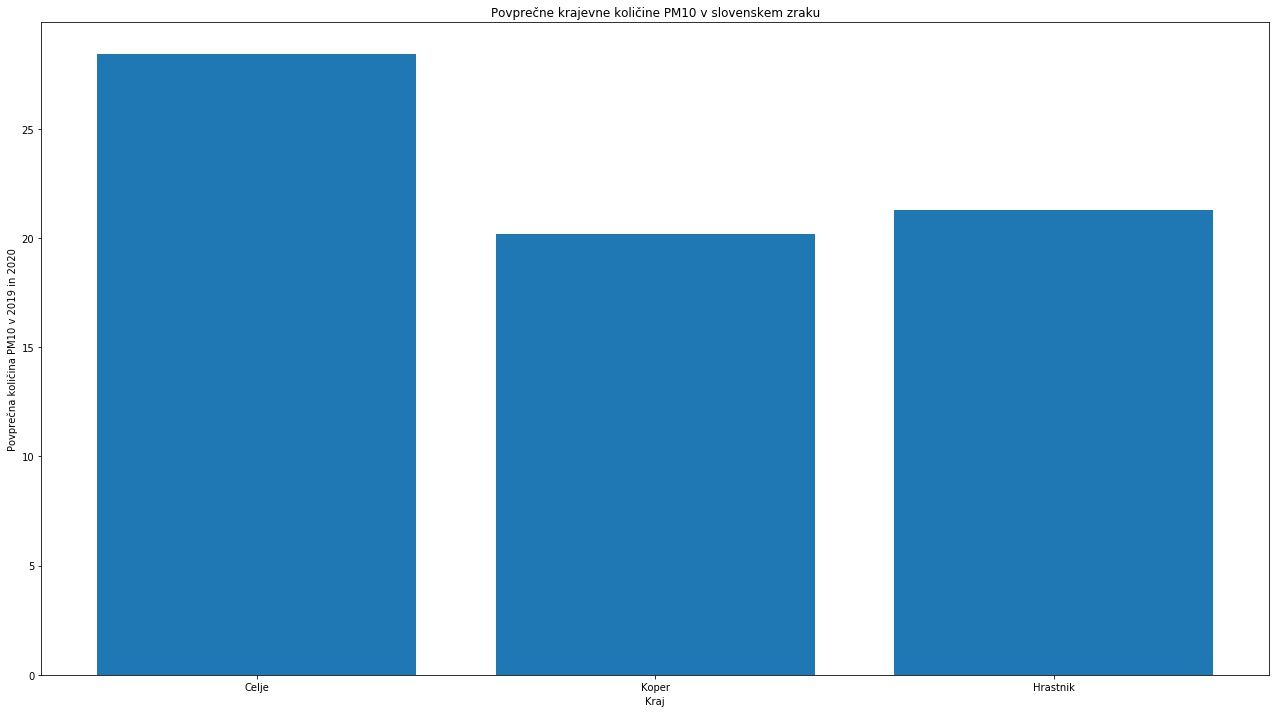

In [11]:
plt.figure(figsize=(22, 12))
plt.bar(['Celje', 'Koper', 'Hrastnik'], cities(pm10, pm10_2019_frame.columns, ['Celje', 'Koper', 'Hrastnik']))
x = plt.xlabel('Kraj')
x = plt.ylabel('Povprečna količina PM10 v 2019 in 2020')
x = plt.title('Povprečne krajevne količine PM10 v slovenskem zraku')
plt.show()

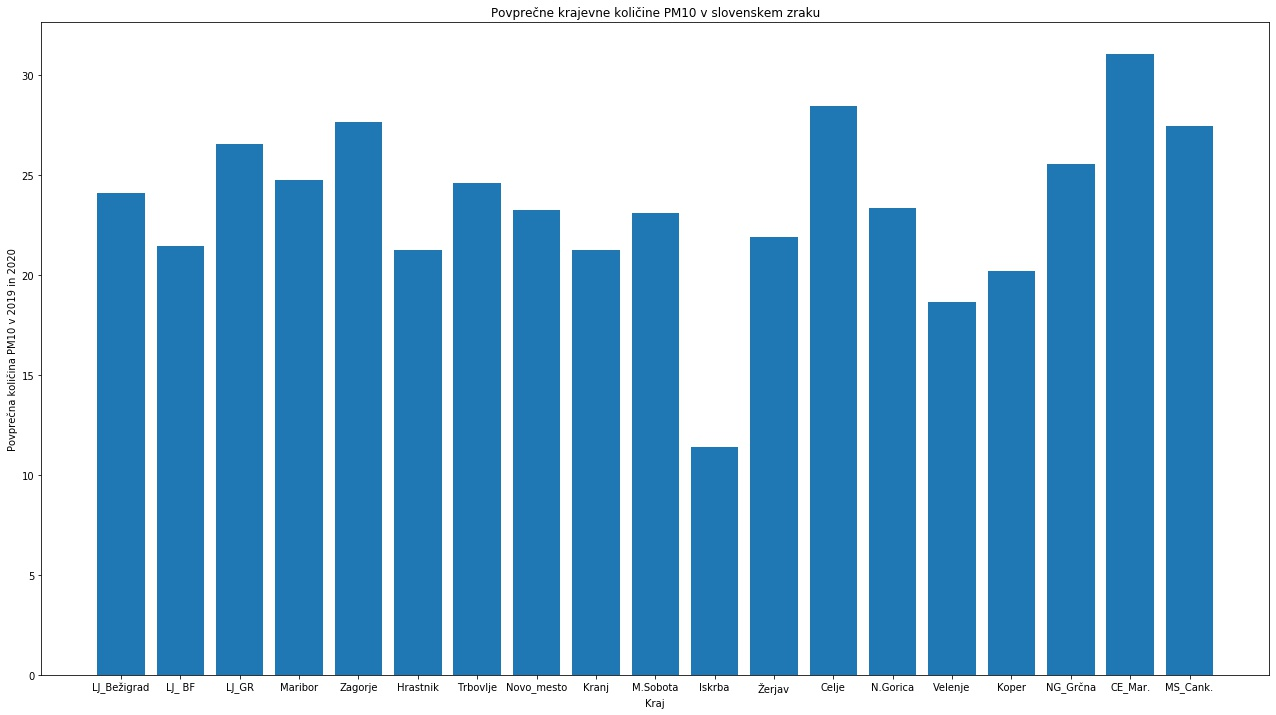

In [12]:
plt.figure(figsize=(22, 12))
plt.bar(pm10_2019_frame.columns[1:20], cities(pm10, pm10_2019_frame.columns))
x = plt.xlabel('Kraj')
x = plt.ylabel('Povprečna količina PM10 v 2019 in 2020')
x = plt.title('Povprečne krajevne količine PM10 v slovenskem zraku')
plt.show()

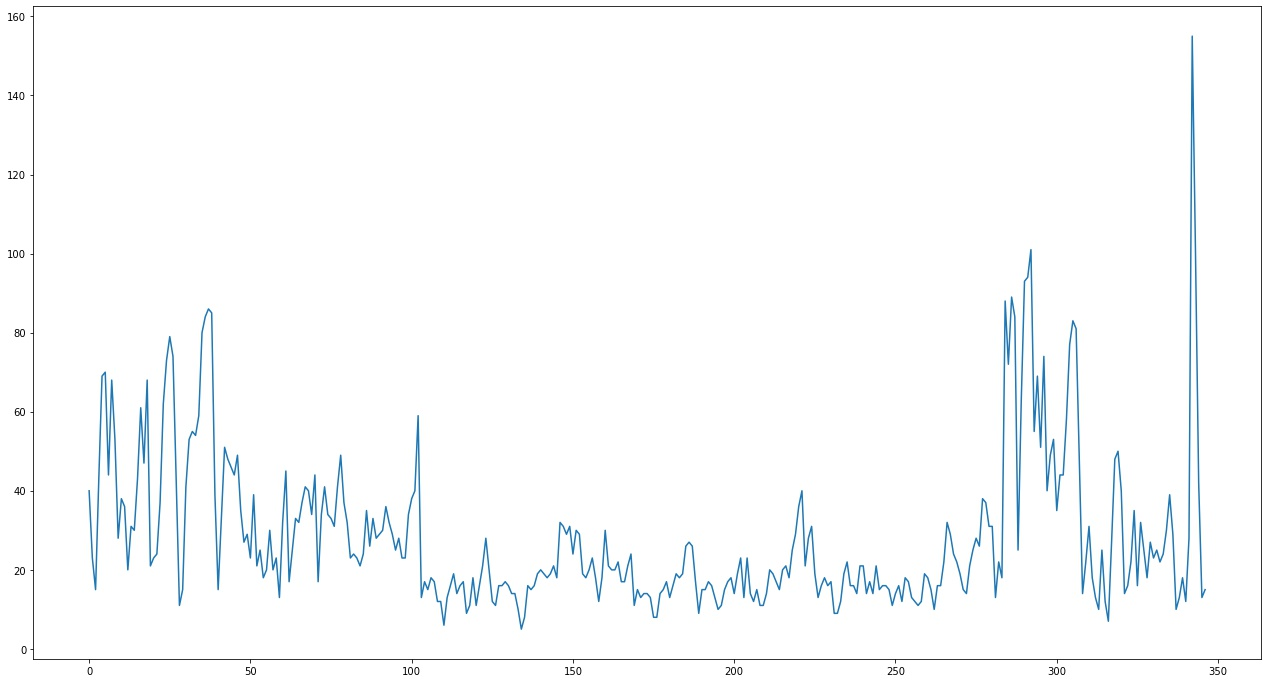

In [13]:
celje = city(pm10, pm10_2019_frame.columns, 'Celje')
x = plt.figure(figsize=(22, 12))
x = plt.plot(range(len(celje)), celje)

## PM 2.5

In [14]:
pm25_2019_frame = pd.read_csv('podatki/PM2.5_2019.csv', encoding='utf-8')
pm25_2019_frame[:10]

,datum,LJ_Bežigrad,NG,MB_Vrbanski,Iskrba,Celje
0,01.01.19,26,32,28,7,-
1,02.01.19,19,16,9,7,-
2,03.01.19,3,14,3,4,-
3,04.01.19,9,20,14,5,-
4,05.01.19,43,30,23,9,-
5,06.01.19,40,29,20,9,-
6,07.01.19,22,23,21,8,-
7,08.01.19,35,34,32,11,-
8,09.01.19,34,42,13,10,-
9,10.01.19,35,19,11,9,-


In [15]:
pm25_2020_frame = pd.read_csv('podatki/pm2.5_2020.csv', encoding='utf-8')
pm25_2020_frame[:10]

,datum,LJ_Bežigrad,NG,MB_Vranski,Iskrba,Celje
0,01.01.20,86,20,45,7,82
1,02.01.20,65,22,33,6,67
2,03.01.20,69,31,44,4,77
3,04.01.20,94,32,37,7,74
4,05.01.20,37,15,9,15,19
5,06.01.20,40,20,24,4,48
6,07.01.20,60,33,39,5,75
7,08.01.20,73,23,39,6,82
8,09.01.20,76,31,50,5,86
9,10.01.20,42,49,61,6,43


In [16]:
# združimo podatke iz 2019 in 2020
pm25_2019 = pm25_2019_frame.values
pm25_2020 = pm25_2020_frame.values

pm25 = np.vstack((pm25_2019, pm25_2020))
pm25[:15]

array([['01.01.19', '26', '32', '28', '7', '-'],
       ['02.01.19', '19', '16', '9', '7', '-'],
       ['03.01.19', '3', '14', '3', '4', '-'],
       ['04.01.19', '9', '20', '14', '5', '-'],
       ['05.01.19', '43', '30', '23', '9', '-'],
       ['06.01.19', '40', '29', '20', '9', '-'],
       ['07.01.19', '22', '23', '21', '8', '-'],
       ['08.01.19', '35', '34', '32', '11', '-'],
       ['09.01.19', '34', '42', '13', '10', '-'],
       ['10.01.19', '35', '19', '11', '9', '-'],
       ['11.01.19', '19', '21', '12', '7', '-'],
       ['12.01.19', '47', '37', '30', '8', '-'],
       ['13.01.19', '47', '36', '17', '10', '-'],
       ['14.01.19', '17', '46', '3', '-', '-'],
       ['15.01.19', '9', '22', '22', '-', '-']], dtype=object)

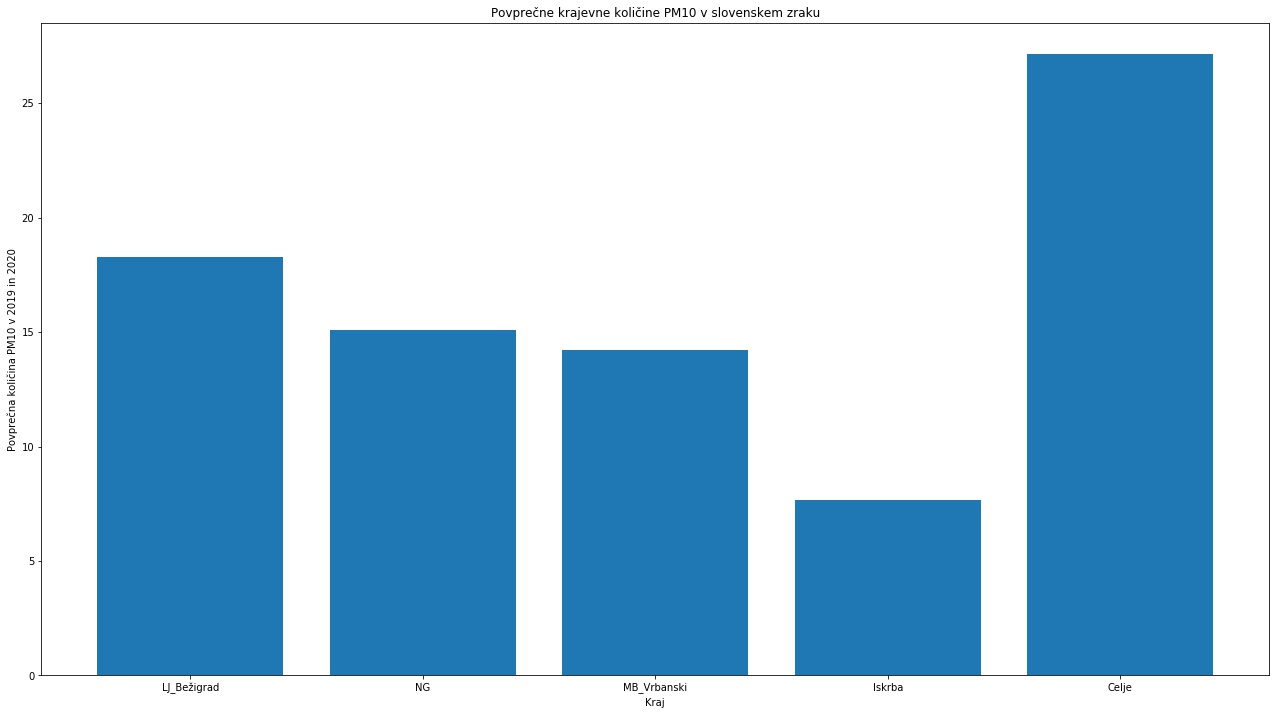

In [17]:
plt.figure(figsize=(22, 12))
plt.bar(pm25_2019_frame.columns[1:6], cities(pm25, pm25_2019_frame.columns))
x = plt.xlabel('Kraj')
x = plt.ylabel('Povprečna količina PM10 v 2019 in 2020')
x = plt.title('Povprečne krajevne količine PM10 v slovenskem zraku')
plt.show()

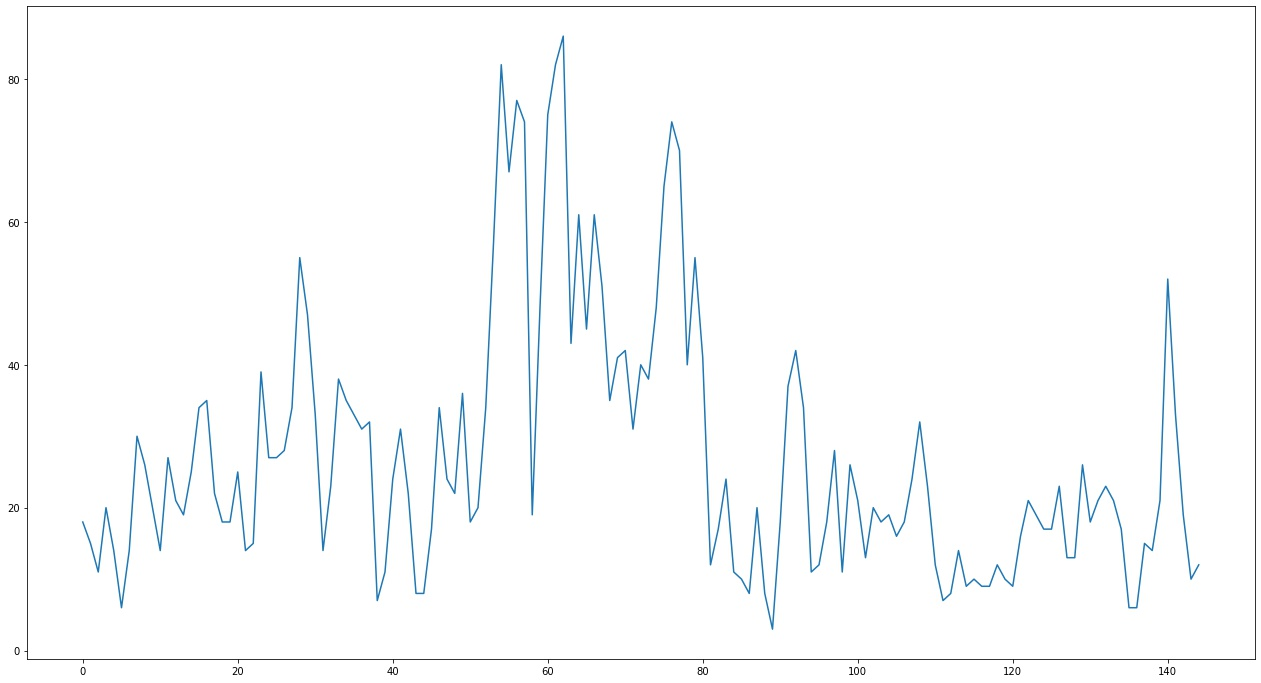

In [18]:
celje = city(pm25, pm25_2019_frame.columns, 'Celje')
x = plt.figure(figsize=(22, 12))
x = plt.plot(range(len(celje)), celje)

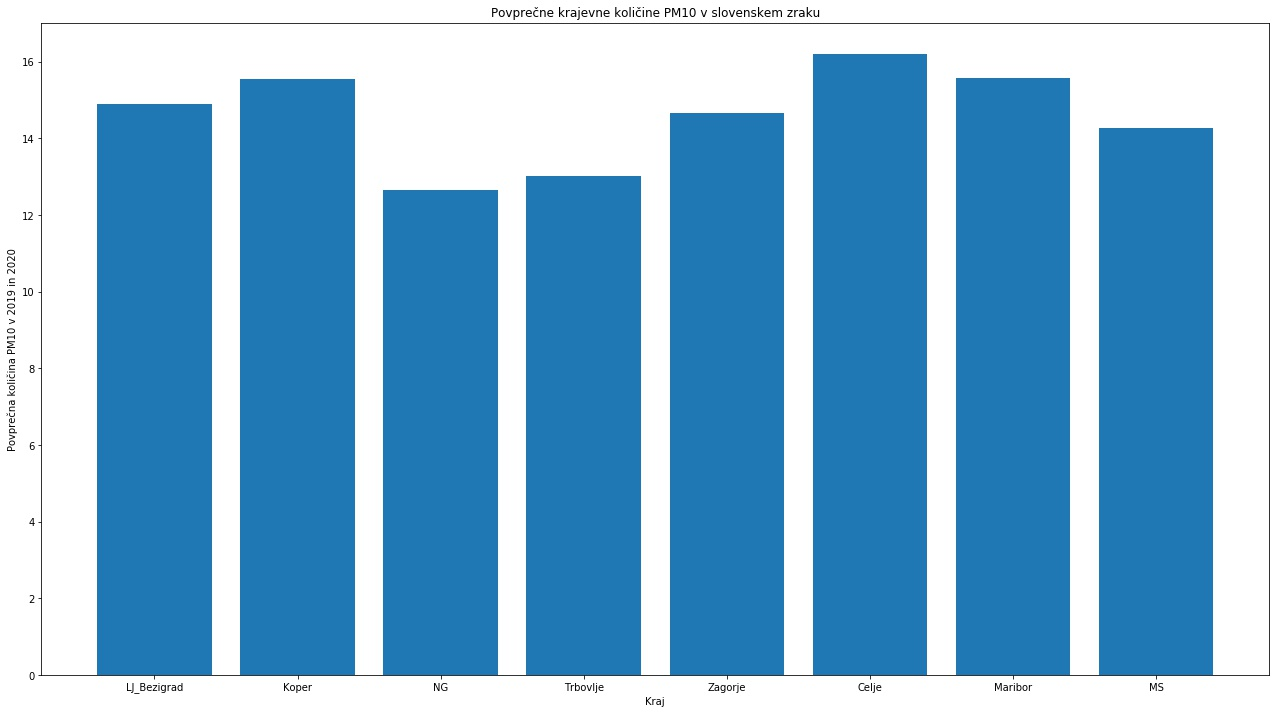

In [19]:
pm10_april_maj = pm10_april_maj_frame.values

plt.figure(figsize=(22, 12))
plt.bar(pm10_april_maj_frame.columns[1:9], cities(pm10_april_maj, pm10_april_maj_frame.columns))
x = plt.xlabel('Kraj')
x = plt.ylabel('Povprečna količina PM10 v 2019 in 2020')
x = plt.title('Povprečne krajevne količine PM10 v slovenskem zraku')
plt.show()

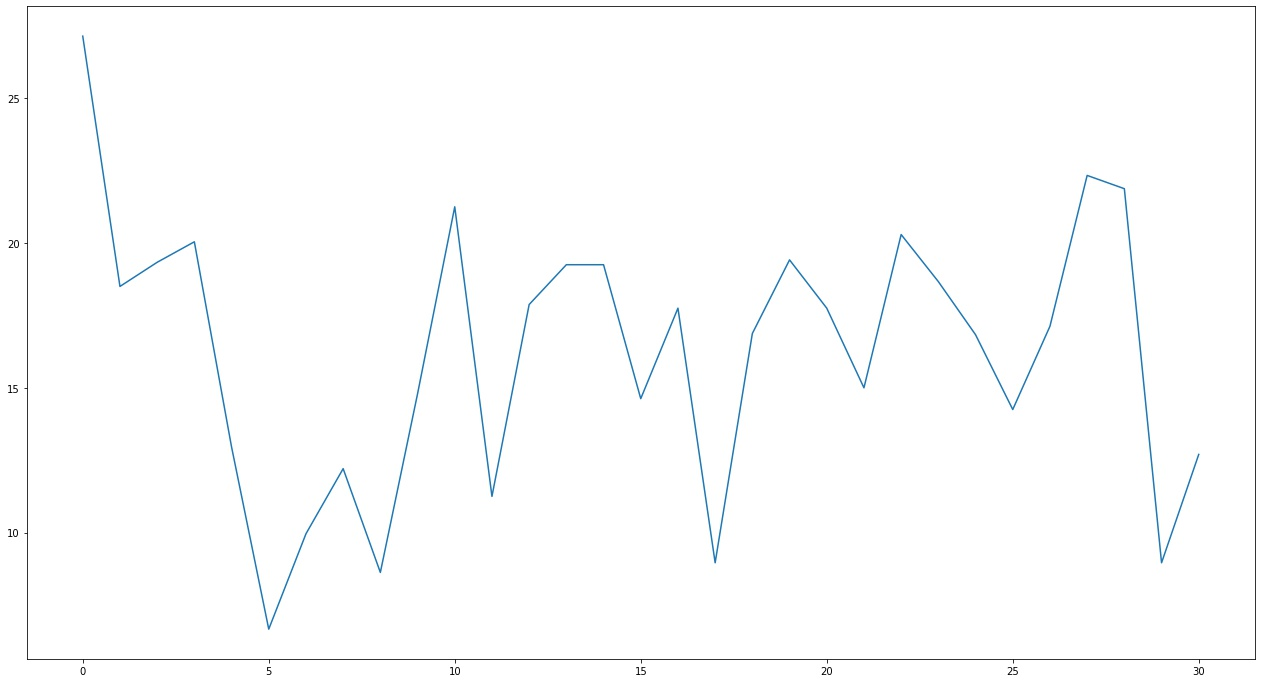

In [20]:
celje = city(pm10_april_maj, pm10_april_maj_frame.columns, 'Celje')
x = plt.figure(figsize=(22, 12))
x = plt.plot(range(len(celje)), celje)

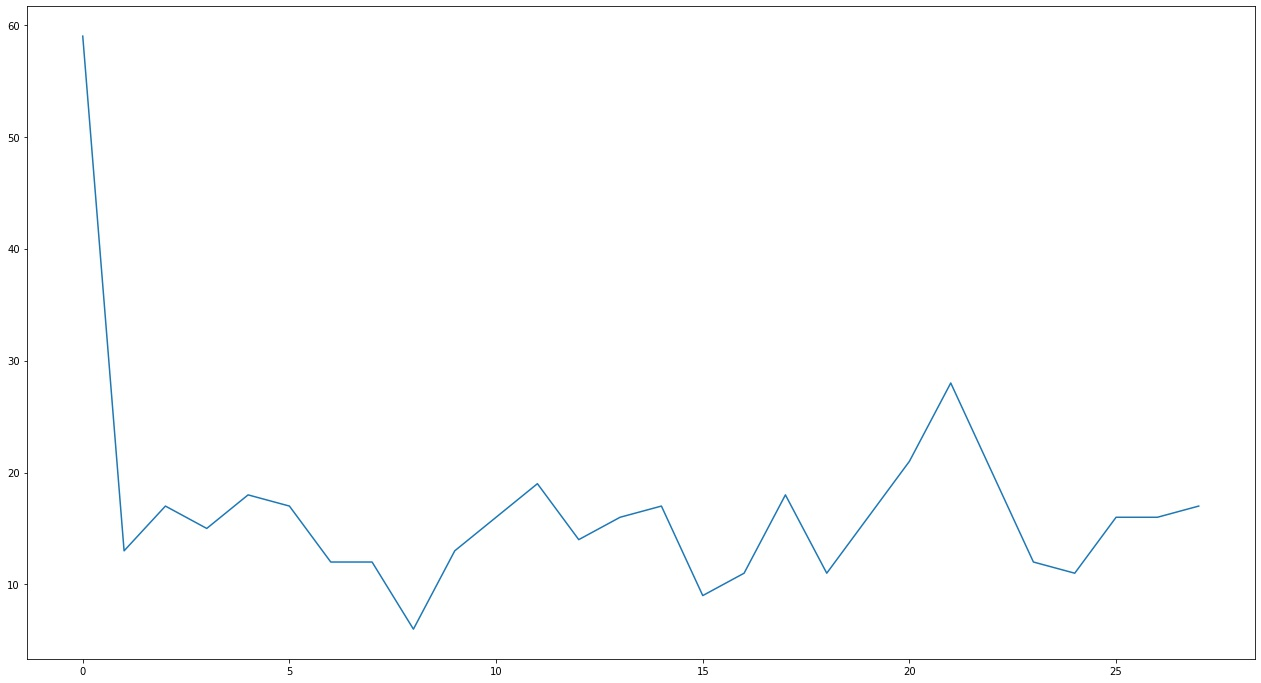

In [21]:
celje = city(pm10, pm10_2019_frame.columns, 'Celje', _from = '25.04.19', _to = '25.05.19')
x = plt.figure(figsize=(22, 12))
x = plt.plot(range(len(celje)), celje)

# Primerjava onesnaženosti letos in lani

In [94]:
comparison = np.array([])
for name in pm10_2019_frame.columns[1:]:
    city = pm10_2019_frame.columns.get_loc(name)
    data_2019 = pm10_2019[pm10_2019[:, city] != '-', city].astype(float)
    city = pm10_2020_frame.columns.get_loc(name)
    data_2020 = pm10_2020[pm10_2020[:, city] != '-', city].astype(float)
    means = [np.mean(data_2019), np.mean(data_2020)]
    if len(comparison) == 0:
        comparison = means
    else:
        comparison = np.vstack((comparison, means))
comparison

array([[20.80398671, 35.05494505],
       [18.910299  , 29.94505495],
       [23.47491639, 36.78651685],
       [22.28813559, 32.8021978 ],
       [24.63545151, 37.64835165],
       [19.39333333, 27.54444444],
       [21.33818182, 34.42857143],
       [20.8125    , 31.47252747],
       [19.29292929, 27.71111111],
       [20.77627119, 30.72527473],
       [11.85430464,  9.93333333],
       [19.31081081, 30.44444444],
       [25.28521127, 42.71428571],
       [20.38487973, 33.01111111],
       [17.21016949, 23.36666667],
       [17.19463087, 30.02197802],
       [22.74917492, 34.98888889],
       [27.64473684, 42.54945055],
       [24.79734219, 36.21978022]])

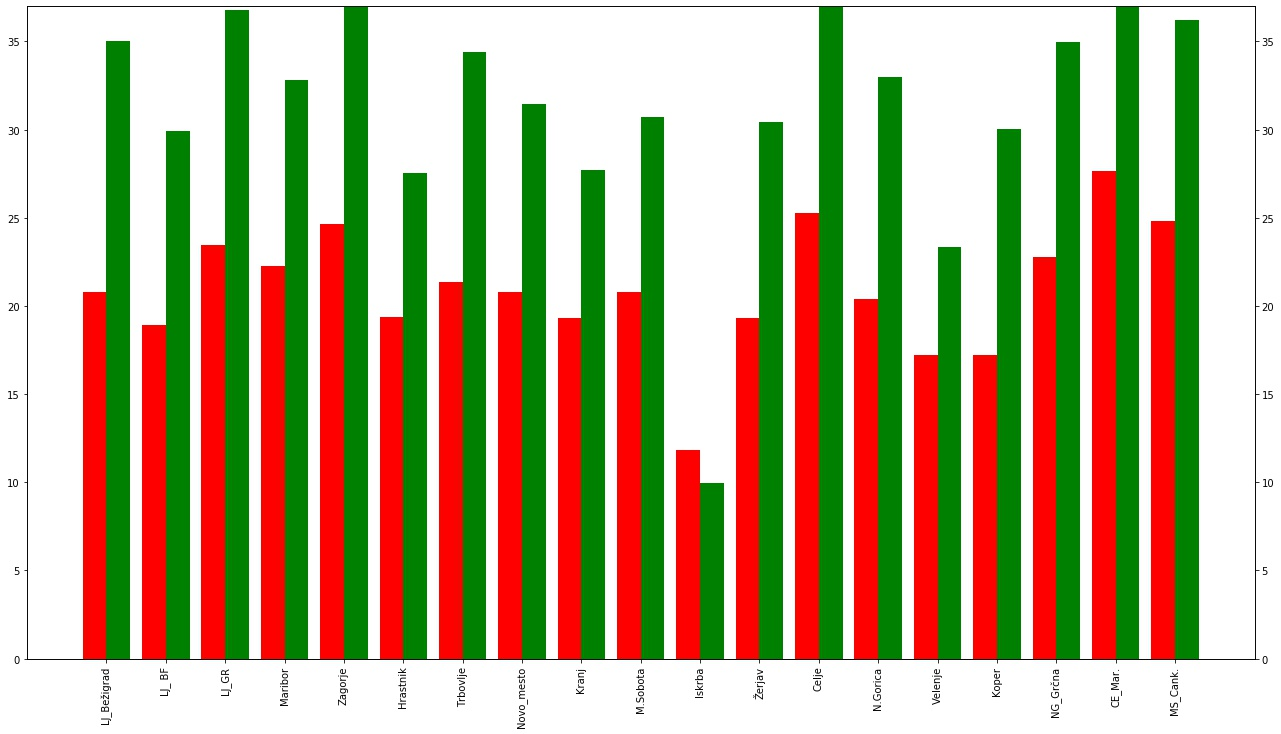

In [95]:
x = np.arange(len(comparison))
w = 0.4
plt.figure(figsize=(22, 12))
x1 = plt.subplot(1, 1, 1)
plt.xticks(x + w / 2, pm10_2019_frame.columns[1:], rotation='vertical')
x1.bar(x, comparison[:, 0], width = w, color='r', align='center')
plt.ylim((0, 37)) 
x2 = x1.twinx()
x2.bar(x+w, comparison[:, 1], width = w, color='g', align='center')
plt.ylim((0, 37)) 
plt.show()

## Med aprilom in majem

In [22]:
pm10_ly = pm10_2019[:]

In [62]:
comparison = np.array([])
for name in pm10_april_maj_frame.columns[1:]:
    city = pm10_2019_frame.columns.get_loc(name)
    data_2019 = pm10_2019[(pd.to_datetime(pm10_2019[:, 0]) > pd.to_datetime('24.04.19')) * (pd.to_datetime(pm10_2019[:, 0]) < pd.to_datetime('26.05.19')), city]
    data_2019 = data_2019[data_2019[:] != '-'].astype(float)
    city = pm10_april_maj_frame.columns.get_loc(name)
    data_2020 = pm10_april_maj[pm10_april_maj[:, city] != '-', city]
    means = [np.mean(data_2019), np.mean(data_2020)]
    if len(comparison) == 0:
        comparison = means
    else:
        comparison = np.vstack((comparison, means))
comparison

array([[15.65517241, 14.890553  ],
       [14.82142857, 15.54135945],
       [16.2       , 12.64051459],
       [14.51851852, 13.01580987],
       [18.44827586, 14.6671659 ],
       [21.39285714, 16.20998464],
       [19.13793103, 15.57009147],
       [15.48275862, 14.25862386]])

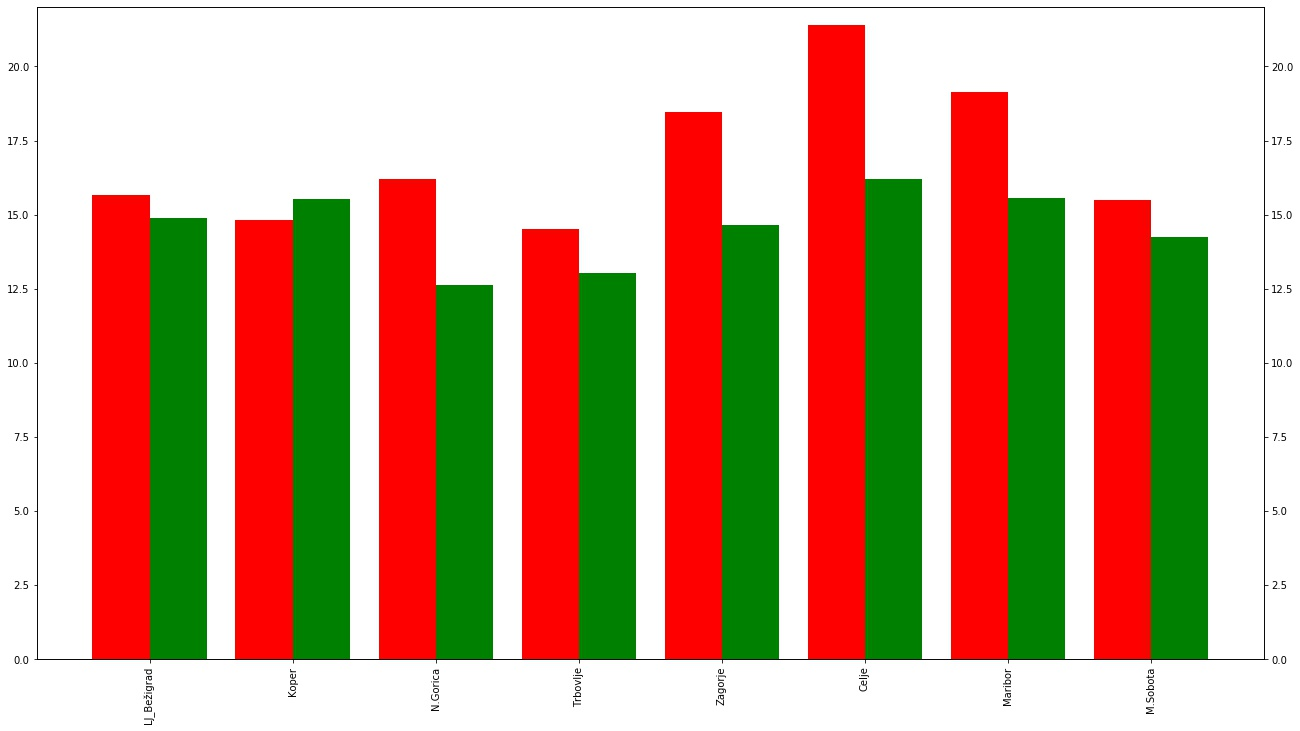

In [89]:
x = np.arange(len(comparison))
w = 0.4
plt.figure(figsize=(22, 12))
x1 = plt.subplot(1, 1, 1)
plt.xticks(x + w / 2, pm10_april_maj_frame.columns[1:], rotation='vertical')
x1.bar(x, comparison[:, 0], width = w, color='r', align='center')
plt.ylim((0, 22)) 
x2 = x1.twinx()
x2.bar(x+w, comparison[:, 1], width = w, color='g', align='center')
plt.ylim((0, 22)) 
plt.show()